In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('affair_data.csv')
X = data[data.columns[:-1]]
Y = data['affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train,Y_train)

LogisticRegression()

In [30]:
tpr=np.zeros(100)
fpr=np.zeros(100)

predictions = model.predict_proba( X_test )

for i in range(100):
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
            if predicted_prob >= i/100:
                predicted = 1
            else:
                predicted = 0
    
            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1    
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
    tpr[i]=tp/(tp+fn)
    fpr[i]=fp/(fp+tn)

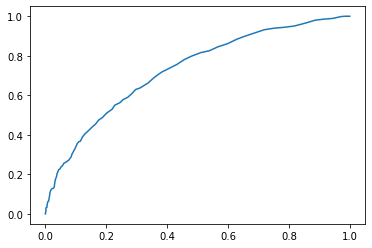

In [31]:
plt.plot(fpr,tpr)

In [27]:
from sklearn.metrics import roc_curve

In [28]:
fpr_auto, tpr_auto, thres = roc_curve( Y_test, predictions[:, 1] )

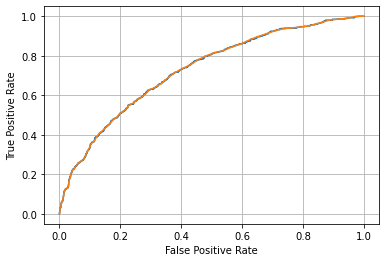

In [36]:
plt.plot(fpr_auto,tpr_auto,label='ROC curve auto')
plt.plot(fpr,tpr,label='ROC curve handmade')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()